State |00> with amplitude (0.7071067811865475+0j) and probability 50.0 %
State |11> with amplitude (0.7071067811865475+0j) and probability 50.0 %


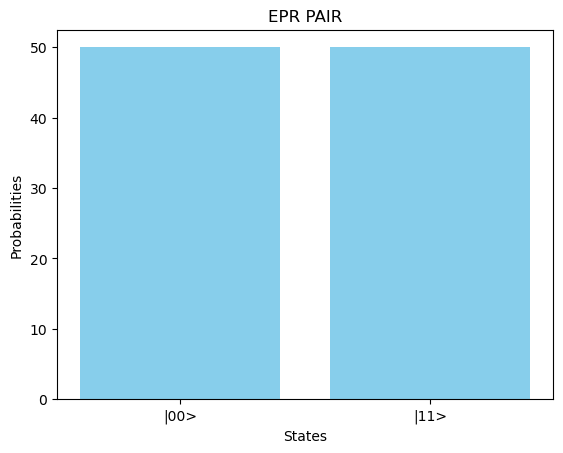

In [2]:
import qiskit
qiskit.__qiskit_version__
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit import execute

In [6]:
import numpy as np
from qat.core import Observable as Obs
from qat.lang import RY, CNOT, qfunc

# Here we specify that thetas is an array of length 2
@qfunc(thetas=2)
def energy(thetas):
                    # Quantum job
                    # Define Ansätz
    RY(thetas[0])(0)
    RY(thetas[1])(1)
    CNOT(0, 1)

                    # Measure observable
    return (
        Obs.sigma_z(0) * Obs.sigma_z(1)
        + Obs.sigma_x(0) * Obs.sigma_x(1)
        + Obs.sigma_y(0) * Obs.sigma_y(1)
    )

from scipy.optimize import minimize

res = minimize(energy, x0=np.array([1.8, 2.8]))
print(res)

# Equivalently, one can delegate the minimization to the default qpu which is
# equiped with a variational optimizer
result = energy.run()
print(f"Minimum VQE energy = {result.value}")

      fun: -0.3099330343247272
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([2.81, 2.8 ])
Minimum VQE energy = -2.9999999999753095


Grover avec les portes de tofolie

In [2]:
qr = QuantumRegister(8,'q')
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
#Le qbit target est le 7
qc.ccx(qr[0],qr[1],qr[4])
qc.ccx(qr[2],qr[4],qr[5])
qc.ccx(qr[3],qr[5],qr[6])
qc.cx(qr[6],qr[7])
qc.ccx(qr[3],qr[5],qr[6])
qc.ccx(qr[2],qr[4],qr[5])
qc.ccx(qr[0],qr[1],qr[4])
qc.draw()

q_0: ──■─────────────────────────────■──
        │                             │  
 q_1: ──■─────────────────────────────■──
        │                             │  
 q_2: ──┼────■───────────────────■────┼──
        │    │                   │    │  
 q_3: ──┼────┼────■─────────■────┼────┼──
      ┌─┴─┐  │    │         │    │  ┌─┴─┐
 q_4: ┤ X ├──■────┼─────────┼────■──┤ X ├
      └───┘┌─┴─┐  │         │  ┌─┴─┐└───┘
 q_5: ─────┤ X ├──■─────────■──┤ X ├─────
           └───┘┌─┴─┐     ┌─┴─┐└───┘     
 q_6: ──────────┤ X ├──■──┤ X ├──────────
                └───┘┌─┴─┐└───┘          
 q_7: ───────────────┤ X ├───────────────
                     └───┘               
c0: 2/═══════════════════════════════════

In [3]:
job = execute(qc,backend, shots=11)
my_results = job.result()
print(my_results.get_counts(qc))

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001CFFE08C040>"'

Exercice 2
On veut implémenter l'oracle de Grover pour 2 qbit

In [4]:
q1 = QuantumRegister(4,'q')
c1 = ClassicalRegister(1)
qc1 = QuantumCircuit(q1,c1)
qc1.initialize([1,0],q1[0])
qc1.x(q1[0])
qc1.ccx(q1[0],q1[1],q1[2])
qc1.x(q1[0])
qc1.measure_all()
qc1.draw()

┌─────────────────┐┌───┐     ┌───┐ ░ ┌─┐         
   q_0: ┤ Initialize(1,0) ├┤ X ├──■──┤ X ├─░─┤M├─────────
        └─────────────────┘└───┘  │  └───┘ ░ └╥┘┌─┐      
   q_1: ──────────────────────────■────────░──╫─┤M├──────
                                ┌─┴─┐      ░  ║ └╥┘┌─┐   
   q_2: ────────────────────────┤ X ├──────░──╫──╫─┤M├───
                                └───┘      ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────────────────────────░──╫──╫──╫─┤M├
                                           ░  ║  ║  ║ └╥┘
  c1: 1/══════════════════════════════════════╬══╬══╬══╬═
                                              ║  ║  ║  ║ 
meas: 4/══════════════════════════════════════╩══╩══╩══╩═
                                              0  1  2  3

In [5]:
job = execute(qc1,backend, shots=11)
my_results = job.result()
print(my_results.get_counts(qc1))

{'0000 0': 11}


Question 2

In [6]:
q2 = QuantumRegister(3,'q')
c2 = ClassicalRegister(2)
qc2 = QuantumCircuit(q2,c2)
qc2.x(q2[2])
qc2.h(q2[2])
qc2.barrier()
#Hadamard sur les deux premiers qbits
qc2.h(q2[0])
qc2.h(q2[1])
qc2.barrier()
#Oracle
qc2.x(q2[0])
qc2.ccx(q2[0],q2[1],q2[2])
qc2.x(q2[0])
qc2.id(q2[1])
#S
qc2.h(q2[0])
qc2.h(q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.cz(q2[0],q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.h(q2[0])
qc2.h(q2[1])
qc2.barrier()
#Oracle
qc2.x(q2[0])
qc2.ccx(q2[0],q2[1],q2[2])
qc2.x(q2[0])
qc2.id(q2[1])
#S
qc2.h(q2[0])
qc2.h(q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.cz(q2[0],q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.h(q2[0])
qc2.h(q2[1])
qc2.barrier()
#Oracle
qc2.x(q2[0])
qc2.ccx(q2[0],q2[1],q2[2])
qc2.x(q2[0])
qc2.id(q2[1])
#S
qc2.h(q2[0])
qc2.h(q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.cz(q2[0],q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.h(q2[0])
qc2.h(q2[1])
qc2.barrier()
#Oracle
qc2.x(q2[0])
qc2.ccx(q2[0],q2[1],q2[2])
qc2.x(q2[0])
qc2.id(q2[1])
#S
qc2.h(q2[0])
qc2.h(q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.cz(q2[0],q2[1])
qc2.x(q2[0])
qc2.x(q2[1])
qc2.h(q2[0])
qc2.h(q2[1])
qc2.barrier()
#Hadamard sur les deux premiers qbits
qc2.barrier()
qc2.measure(q2[0],c2[0])
qc2.measure(q2[1],c2[1])
qc2.draw()

░ ┌───┐ ░ ┌───┐     ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌───┐     »
 q_0: ───────────░─┤ H ├─░─┤ X ├──■──┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤ X ├──■──»
                 ░ ├───┤ ░ └───┘  │  ├───┤├───┤├───┤ │ ├───┤├───┤ ░ └───┘  │  »
 q_1: ───────────░─┤ H ├─░────────■──┤ I ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░────────■──»
      ┌───┐┌───┐ ░ └───┘ ░      ┌─┴─┐└───┘└───┘└───┘   └───┘└───┘ ░      ┌─┴─┐»
 q_2: ┤ X ├┤ H ├─░───────░──────┤ X ├─────────────────────────────░──────┤ X ├»
      └───┘└───┘ ░       ░      └───┘                             ░      └───┘»
c2: 2/════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌───┐     ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ »
« q_0: ┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤ X ├──■──┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─»
«      ├───┤├───┤├───┤ │ ├───┤├───┤ ░ └───┘  │  ├───┤├───┤├───┤ │ ├───┤├───┤ ░ »
« q_1: ┤ I ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░────────■──┤ I ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─»
«      └───┘└───┘└───┘   └───┘└───┘ ░      ┌─┴─┐└───┘└───┘└───┘   └───┘└───┘ ░ »
« q_2: ─────────────────────────────░──────┤ X ├─────────────────────────────░─»
«                                   ░      └───┘                             ░ »
«c2: 2/════════════════════════════════════════════════════════════════════════»
«                                                                              »
«      ┌───┐     ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░  ░ ┌─┐   
« q_0: ┤ X ├──■──┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──░─┤M├───
«      └───┘  │  ├───┤├───┤├───┤ │ ├───┤├───┤ ░  ░ └╥┘┌─┐
« q_1: ───────■──┤ I ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──░──╫─┤M├
«           ┌─┴─┐└───┘└───┘└───┘   └───┘└───┘ ░  ░  ║ └╥┘
« q_2: ─────┤ X ├─────────────────────────────░──░──╫──╫─
«           └───┘                             ░  ░  ║  ║ 
«c2: 2/═════════════════════════════════════════════╩══╩═
«                                                   0  1

In [7]:
job = execute(qc1,backend, shots=11)
my_results = job.result()
print(my_results.get_counts(qc1))

{'0000 0': 11}


q3)Pour l'état 11 on enlève juste le X dans l'oracle
q4)Pour la proba d'échec,on a pour p porte (1-to)^p

Exercice3

In [8]:
q3 = QuantumRegister(7,'q')
c3 = ClassicalRegister(2)
qc3 = QuantumCircuit(q3,c3)
#première clause
qc3.x(q3[0])
qc3.x(q3[1])
qc3.id(q3[2])
qc3.mcx([0,1,2],q3[3])
qc3.barrier()
qc3.x(q3[0])
qc3.x(q3[1])
qc3.x(q3[3])
qc3.barrier()
#deuxième clause
qc3.mcx([0,1,2],q3[4])
qc3.x(q3[4])
qc3.barrier()
#troisième clause
qc3.x(q3[1])
qc3.x(q3[2])
qc3.mcx([0,1,2],q3[5])
qc3.barrier()
qc3.x(q3[5])
qc3.barrier()
qc3.mcx([3,4,5],q3[6])
qc3.draw()

┌───┐      ░ ┌───┐ ░            ░            ░       ░      
 q_0: ┤ X ├──■───░─┤ X ├─░───■────────░────────■───░───────░──────
      ├───┤  │   ░ ├───┤ ░   │        ░ ┌───┐  │   ░       ░      
 q_1: ┤ X ├──■───░─┤ X ├─░───■────────░─┤ X ├──■───░───────░──────
      ├───┤  │   ░ └───┘ ░   │        ░ ├───┤  │   ░       ░      
 q_2: ┤ I ├──■───░───────░───■────────░─┤ X ├──■───░───────░──────
      └───┘┌─┴─┐ ░ ┌───┐ ░   │        ░ └───┘  │   ░       ░      
 q_3: ─────┤ X ├─░─┤ X ├─░───┼────────░────────┼───░───────░───■──
           └───┘ ░ └───┘ ░ ┌─┴─┐┌───┐ ░        │   ░       ░   │  
 q_4: ───────────░───────░─┤ X ├┤ X ├─░────────┼───░───────░───■──
                 ░       ░ └───┘└───┘ ░      ┌─┴─┐ ░ ┌───┐ ░   │  
 q_5: ───────────░───────░────────────░──────┤ X ├─░─┤ X ├─░───■──
                 ░       ░            ░      └───┘ ░ └───┘ ░ ┌─┴─┐
 q_6: ───────────░───────░────────────░────────────░───────░─┤ X ├
                 ░       ░            ░            ░       ░ └───┘
c3: 2/════════════════════════════════════════════════════════════

Application de grover avec amplificateur

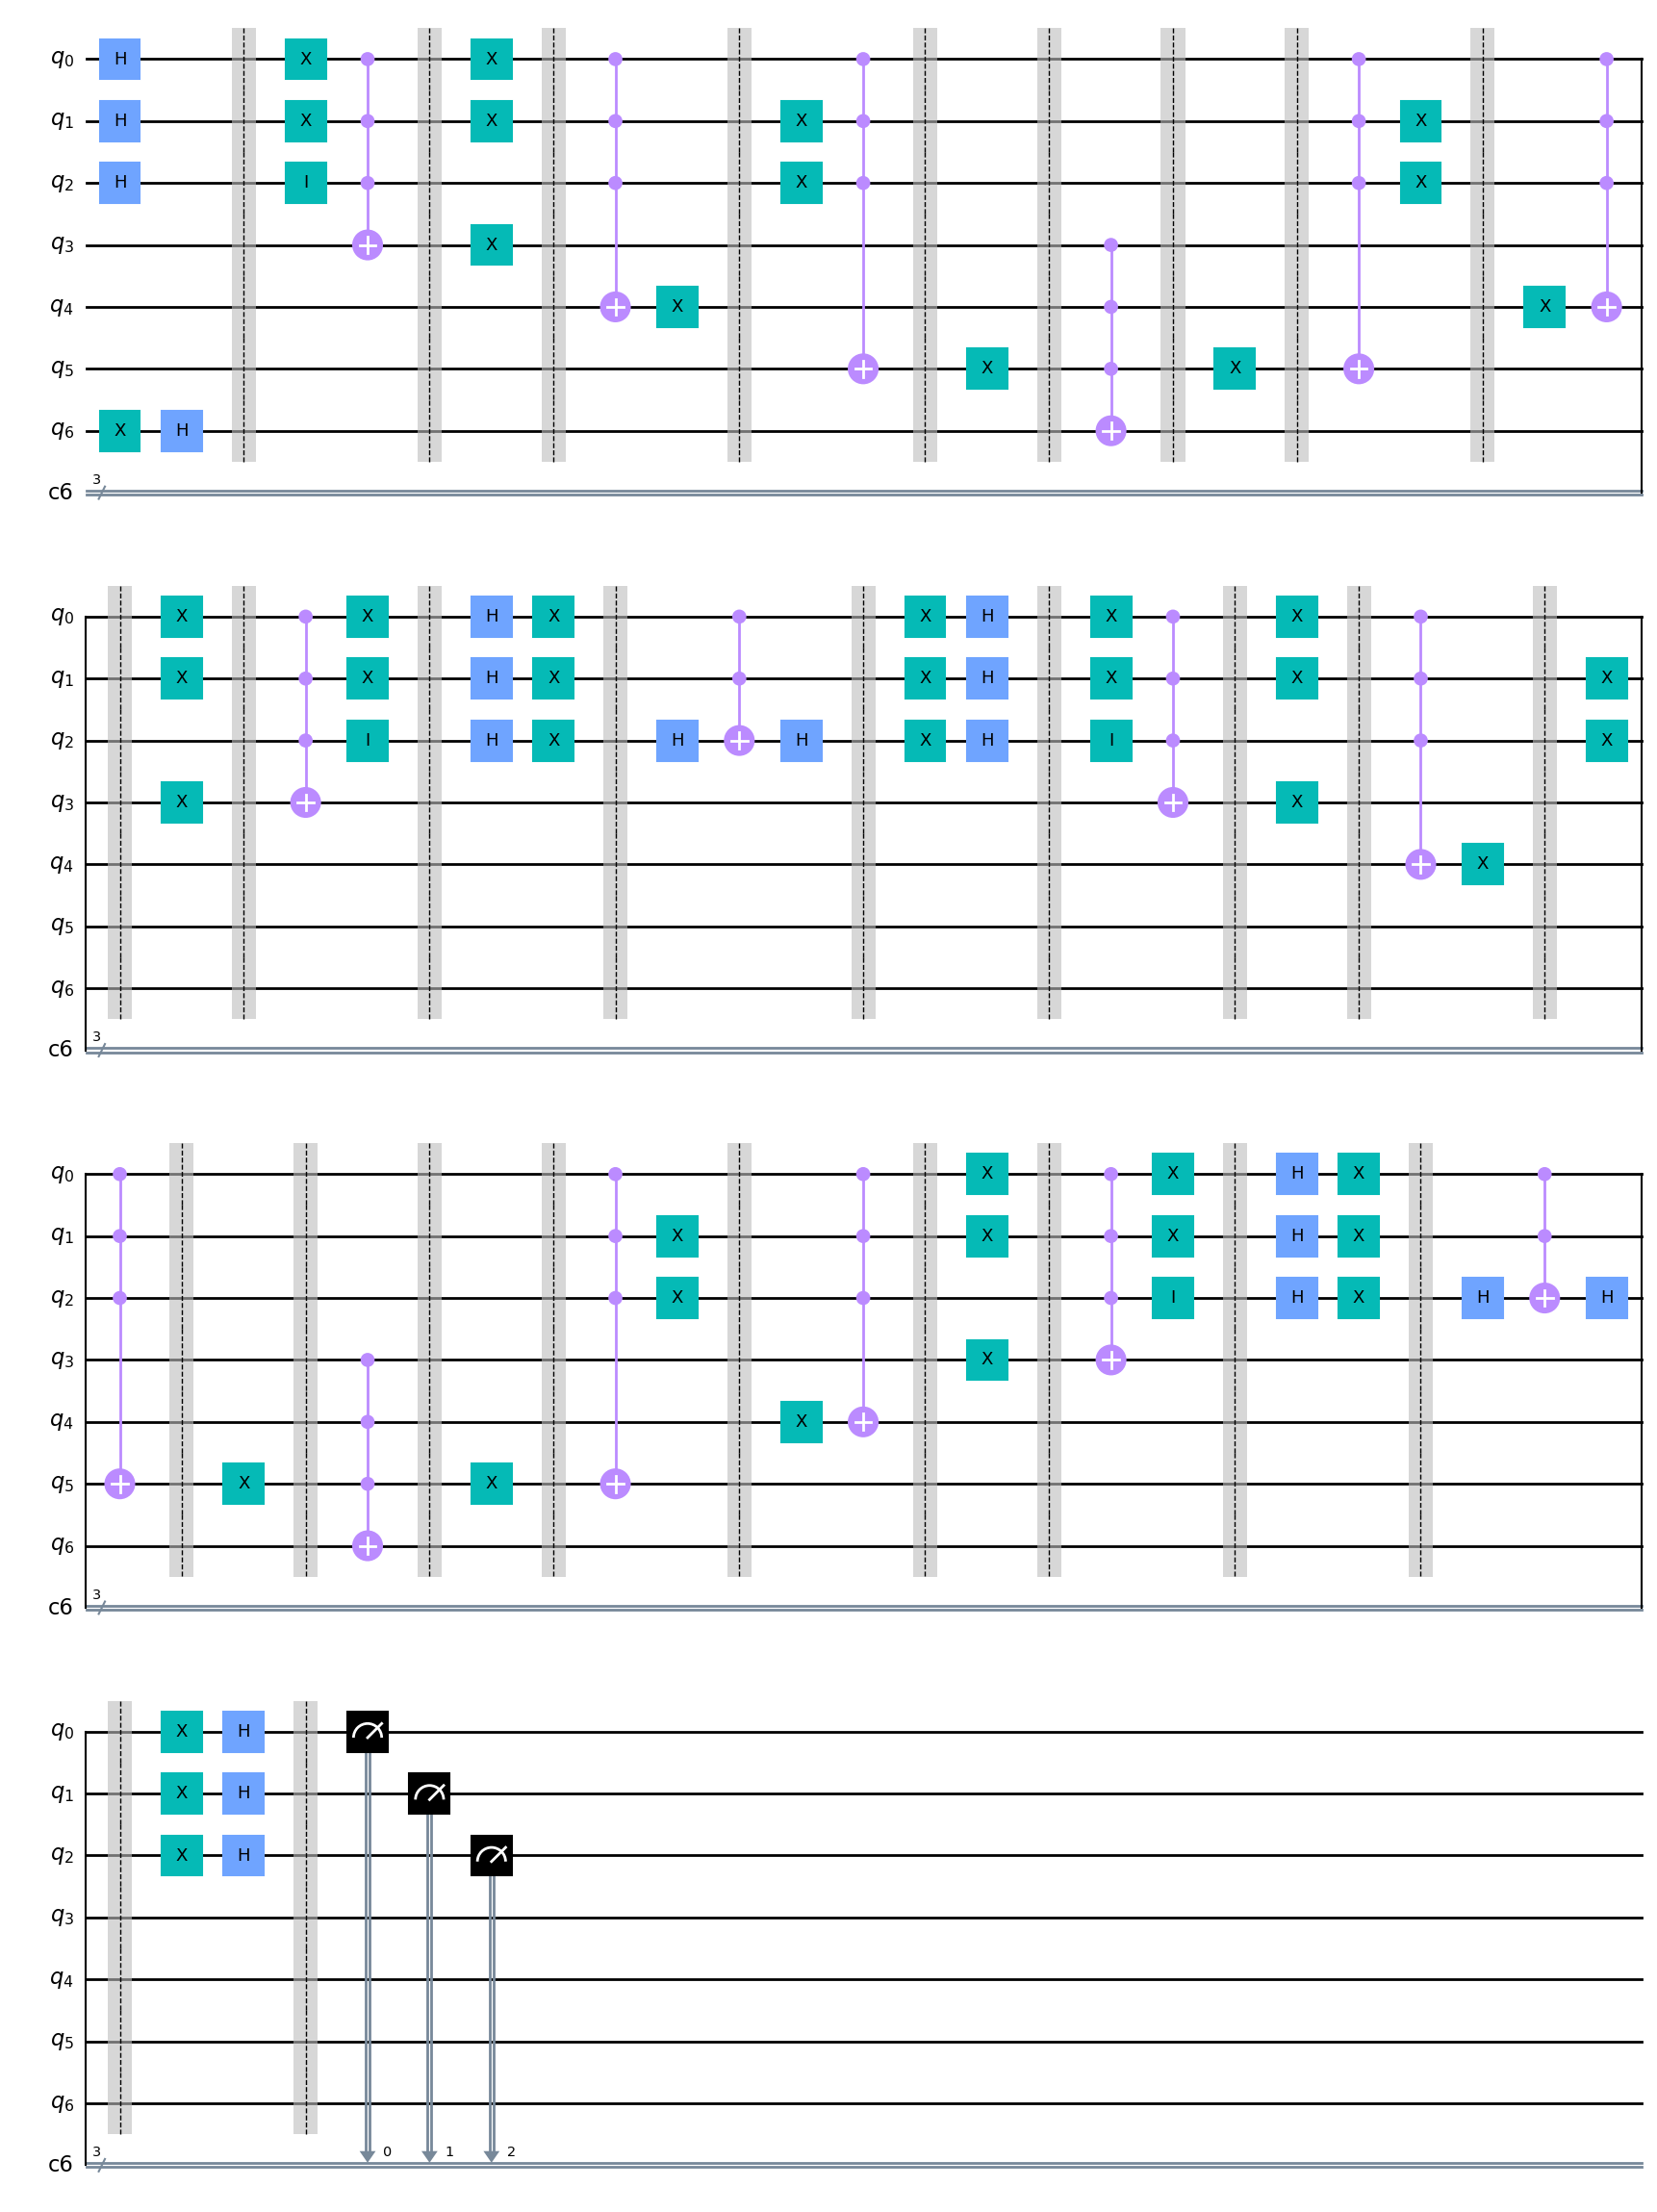

In [13]:
q4 = QuantumRegister(7,'q')
c4 = ClassicalRegister(3)
qc4 = QuantumCircuit(q4,c4)
#condition initiale
qc4.x(q4[6])
qc4.h(q4[6])
qc4.h(q4[0])
qc4.h(q4[1])
qc4.h(q4[2])
qc4.barrier()
#première clause
qc4.x(q4[0])
qc4.x(q4[1])
qc4.id(q4[2])
qc4.mcx([0,1,2],q4[3])
qc4.barrier()
qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[3])
qc4.barrier()
#deuxième clause
qc4.mcx([0,1,2],q4[4])
qc4.x(q4[4])
qc4.barrier()
#troisième clause
qc4.x(q4[1])
qc4.x(q4[2])
qc4.mcx([0,1,2],q4[5])
qc4.barrier()
qc4.x(q4[5])
qc4.barrier()
qc4.mcx([3,4,5],q4[6])
qc4.barrier()
#troisième clause inverse
qc4.x(q4[5])
qc4.barrier()
qc4.mcx([0,1,2],q4[5])
qc4.x(q4[1])
qc4.x(q4[2])
qc4.barrier()

#deuxième clause
qc4.x(q4[4])
qc4.mcx([0,1,2],q4[4])
qc4.barrier()
qc4.x(q4[3])
qc4.x(q4[1])
qc4.x(q4[0])
qc4.barrier()
qc4.mcx([0,1,2],q4[3])
qc4.id(q4[2])
qc4.x(q4[1])
qc4.x(q4[0])
#Amplificateur
qc4.barrier()
qc4.h(q4[0])
qc4.h(q4[1])
qc4.h(q4[2])
qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[2])
qc4.barrier()
#porte z
qc4.h(q4[2])
qc4.mcx([0,1],q4[2])
qc4.h(q4[2])
qc4.barrier()
#seconde partie Amplificateur
qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[2])
qc4.h(q4[0])
qc4.h(q4[1])
qc4.h(q4[2])
qc4.barrier()
#première clause
qc4.x(q4[0])
qc4.x(q4[1])
qc4.id(q4[2])
qc4.mcx([0,1,2],q4[3])
qc4.barrier()
qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[3])
qc4.barrier()
#deuxième clause
qc4.mcx([0,1,2],q4[4])
qc4.x(q4[4])
qc4.barrier()
#troisième clause
qc4.x(q4[1])
qc4.x(q4[2])
qc4.mcx([0,1,2],q4[5])
qc4.barrier()
qc4.x(q4[5])
qc4.barrier()
qc4.mcx([3,4,5],q4[6])
qc4.barrier()
#troisième clause inverse
qc4.x(q4[5])
qc4.barrier()
qc4.mcx([0,1,2],q4[5])
qc4.x(q4[1])
qc4.x(q4[2])
qc4.barrier()
#deuxième clause
qc4.x(q4[4])
qc4.mcx([0,1,2],q4[4])
qc4.barrier()
qc4.x(q4[3])
qc4.x(q4[1])
qc4.x(q4[0])
qc4.barrier()
qc4.mcx([0,1,2],q4[3])
qc4.id(q4[2])
qc4.x(q4[1])
qc4.x(q4[0])
#Amplificateur
qc4.barrier()
qc4.h(q4[0])
qc4.h(q4[1])
qc4.h(q4[2])
qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[2])
qc4.barrier()
#porte z
qc4.h(q4[2])
qc4.mcx([0,1],q4[2])
qc4.h(q4[2])
qc4.barrier()
#seconde partie Amplificateur
qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[2])
qc4.h(q4[0])
qc4.h(q4[1])
qc4.h(q4[2])
qc4.barrier()
#mesure
qc4.measure(q4[0],c4[0])
qc4.measure(q4[1],c4[1])
qc4.measure(q4[2],c4[2])
qc4.draw(output='mpl')

{'001': 124580, '000': 125186, '011': 124502, '010': 125675, '101': 125064, '100': 125040, '111': 125413, '110': 124540}


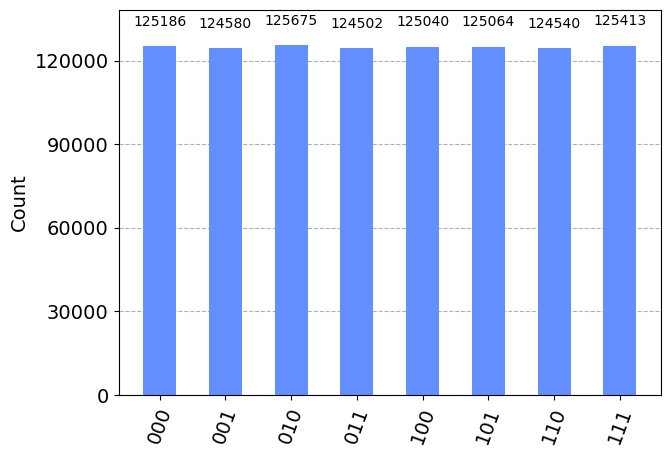

In [12]:
job = execute(qc4,backend, shots=1000000)
my_results = job.result()
print(my_results.get_counts(qc4))
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_results.get_counts(qc4))

5)La répartition devient uniforme

Exercice4

1)Il faut n qbit pour coder l'indice log(2^n de la borne sup)
2)La taille du pour coder l'indice est de 2 car il y a 4 valeurs et 2
3)On fait la table de vérité

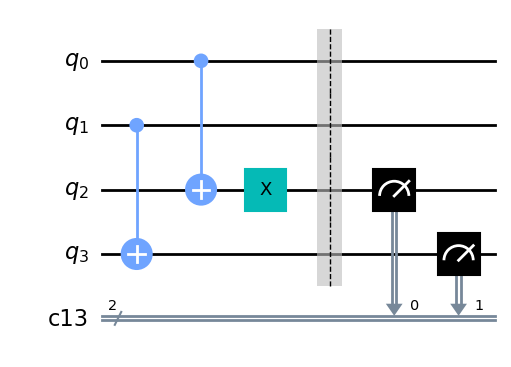

In [22]:
q5 = QuantumRegister(4,'q')
c5 = ClassicalRegister(2)
qc5 = QuantumCircuit(q5,c5)
#condition initiale
#qc5.x(q5[0])
#qc5.x(q5[1])
#circuit pour traduire
qc5.cx(q5[1],q5[3])
qc5.cx(q5[0],q5[2])
qc5.x(q5[2])
qc5.barrier()
qc5.measure(q5[2],c5[0])
qc5.measure(q5[3],c5[1])
qc5.draw(output='mpl')

{'01': 10000}


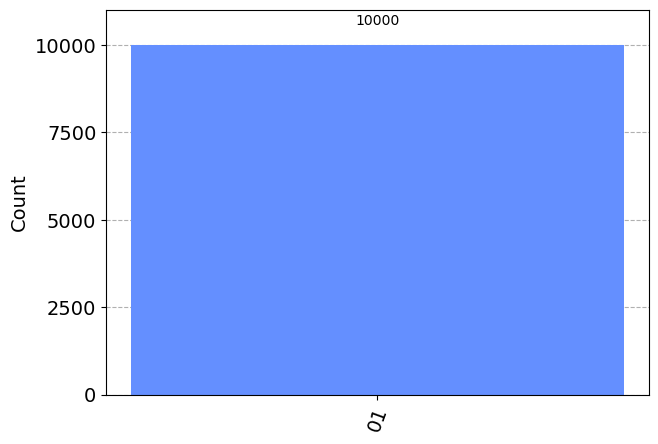

In [23]:
job = execute(qc5,backend, shots=1000)
my_results = job.result()
print(my_results.get_counts(qc5))
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_results.get_counts(qc5))

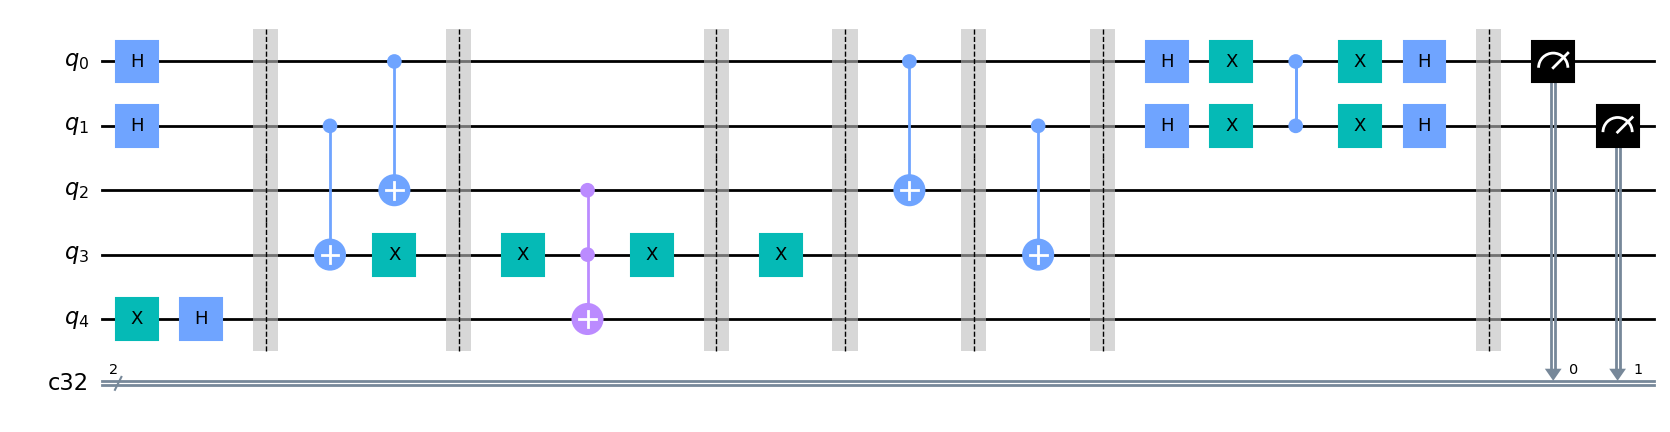

In [48]:
#q5 
q6 = QuantumRegister(5,'q')
c6 = ClassicalRegister(2)
qc6 = QuantumCircuit(q6,c6)
#condition initiale
#qc5.x(q5[0])
#qc5.x(q5[1])
qc6.h(q6[0])
qc6.h(q6[1])
qc6.x(q6[4])
qc6.h(q6[4])
qc6.barrier()
#circuit pour traduire
qc6.cx(q6[1],q6[3])
qc6.cx(q6[0],q6[2])
qc6.x(q6[3])
qc6.barrier()
#deuxième partie oracle
qc6.x(q6[3])
qc6.ccx(q6[2],q6[3],q6[4])
qc6.x(q6[3])
qc6.barrier()
#inverse
qc6.x(q6[3])
qc6.barrier()
qc6.cx(q6[0],q6[2])
qc6.barrier()
qc6.cx(q6[1],q6[3])
qc6.barrier()
#amplificateur
qc6.h(q6[0])
qc6.h(q6[1])
qc6.x(q6[0])
qc6.x(q6[1])
qc6.cz(q6[0],q6[1])
qc6.x(q6[0])
qc6.x(q6[1])
qc6.h(q6[0])
qc6.h(q6[1])
qc6.barrier()
#amplicateur 2
#qc6.h(q6[0])
#qc6.h(q6[1])
#qc6.x(q6[0])
#qc6.x(q6[1])
#qc6.cz(q6[0],q6[1])
#qc6.x(q6[0])
#qc6.x(q6[1])
#qc6.h(q6[0])
#qc6.h(q6[1])
#qc6.barrier()
qc6.measure(q6[0],c6[0])
qc6.measure(q6[1],c6[1])

qc6.draw(output='mpl')


{'11': 10000}


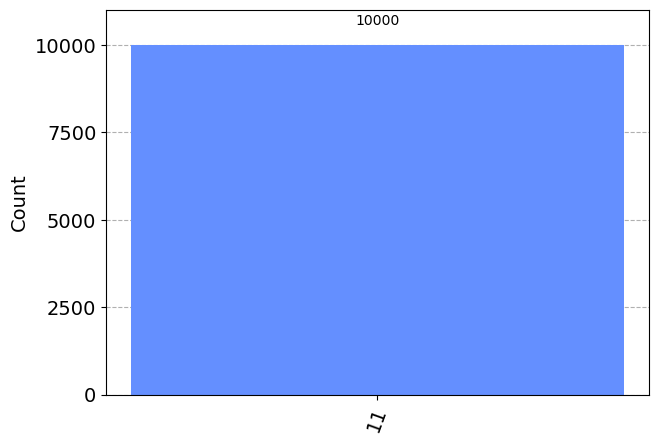

In [49]:
job = execute(qc6,backend, shots=10000)
my_results = job.result()
print(my_results.get_counts(qc6))
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_results.get_counts(qc6))